## Project

### Closed Queueing network simulation

In [14]:
import random
import time
import matplotlib.pyplot as plt
import numpy as np

class Job:
    def __init__(self):
        self.state = 'CPU'
        self.time_remaining = 2
        self.total_time_in_system = 0  # Total response time for the job

#### 1.
Load balancing strategies :
1. Random distribution
2. 70% of the jobs go to fast disk, 30% to slow disk

In [5]:
def assign_disk(strategy, job):
    if strategy == 1:  # Random assignment
        return random.choice(['fast', 'slow'])
    elif strategy == 2:  # Weighted assignment (70% fast, 30% slow)
        return 'fast' if random.random() < 0.7 else 'slow'

def simulate_system(num_jobs, strategy, total_time):
    jobs = [Job() for _ in range(num_jobs)]
    time_elapsed = 0
    completed_jobs = 0

    while time_elapsed < total_time:
        for job in jobs:
            if job.state == 'CPU':
                job.time_remaining -= 1
                if job.time_remaining <= 0:
                    # Move to the disk phase
                    job.state = assign_disk(strategy, job)
                    if job.state == 'fast':
                        job.time_remaining = 3
                    else:
                        job.time_remaining = 30

            elif job.state in ['fast', 'slow']:
                job.time_remaining -= 1
                if job.time_remaining <= 0:
                    # Move to the resting phase
                    job.state = 'rest'
                    job.time_remaining = 15

            elif job.state == 'rest':
                job.time_remaining -= 1
                if job.time_remaining <= 0:
                    # Return to CPU
                    job.state = 'CPU'
                    job.time_remaining = 2
                    completed_jobs += 1

        time_elapsed += 1
        time.sleep(0.01)  # Simulate time passing in small steps

    throughput = completed_jobs / total_time
    return throughput

# Simulate for 1000 seconds with 40 jobs, and strategy 1 (random)
throughput1 = simulate_system(40, 1, 1000)

# Strategy 2 (weighted) simulation
throughput2 = simulate_system(40, 2, 1000)

print("Random strategy troughput:",  throughput1)
print("Weighted strategy troughput:",  throughput2)


Random strategy troughput: 1.192
Weighted strategy troughput: 1.385


#### 2.

In [9]:
import time

class Job:
    def __init__(self):
        self.state = 'CPU'
        self.time_remaining = 1
        
def assign_disk(strategy, job):
    if strategy == 1:  # Random assignment
        return random.choice(['fast', 'slow'])
    elif strategy == 2:  # Weighted assignment (70% fast, 30% slow)
        return 'fast' if random.random() < 0.7 else 'slow'

def simulate_system(num_jobs, strategy, total_time):
    jobs = [Job() for _ in range(num_jobs)]
    time_elapsed = 0
    completed_jobs = 0

    while time_elapsed < total_time:
        for job in jobs:
            if job.state == 'CPU':
                job.time_remaining -= 1
                if job.time_remaining <= 0:
                    # Move to the disk phase
                    job.state = assign_disk(strategy, job)
                    if job.state == 'fast':
                        job.time_remaining = 3
                    else:
                        job.time_remaining = 30

            elif job.state in ['fast', 'slow']:
                job.time_remaining -= 1
                if job.time_remaining <= 0:
                    # Move to the resting phase
                    job.state = 'rest'
                    job.time_remaining = 15

            elif job.state == 'rest':
                job.time_remaining -= 1
                if job.time_remaining <= 0:
                    # Return to CPU
                    job.state = 'CPU'
                    job.time_remaining = 1 
                    completed_jobs += 1

        time_elapsed += 1
        time.sleep(0.01)  # Simulate time passing in small steps

    throughput = completed_jobs / total_time
    return throughput

# Strategy 1 (random)
throughput1 = simulate_system(40, 1, 1000)

# Strategy 2 (weighted) simulation
throughput2 = simulate_system(40, 2, 1000)

print("Random strategy troughput:",  throughput1)
print("Weighted strategy troughput:",  throughput2)

Random strategy troughput: 1.218
Weighted strategy troughput: 1.453


#### 3.

In [8]:
def assign_disk(strategy):
    if strategy == 1:  # Random assignment (among two fast and one slow disk)
        return random.choice(['fast1', 'fast2', 'slow'])
    elif strategy == 2:  # Weighted assignment (35% to each fast disk, 30% to slow)
        r = random.random()
        if r < 0.35:
            return 'fast1'
        elif r < 0.7:
            return 'fast2'
        else:
            return 'slow'

def simulate_system(num_jobs, strategy, total_time):
    jobs = [Job() for _ in range(num_jobs)]
    time_elapsed = 0
    completed_jobs = 0
    total_response_time = 0

    while time_elapsed < total_time:
        for job in jobs:
            if job.state == 'CPU':
                job.time_remaining -= 1
                if job.time_remaining <= 0:
                    # Assign the job to one of the disks based on the strategy
                    job.state = assign_disk(strategy)
                    if job.state == 'fast1' or job.state == 'fast2':
                        job.time_remaining = 3  # Fast disk processing time
                    else:
                        job.time_remaining = 30  # Slow disk processing time

            elif job.state in ['fast1', 'fast2', 'slow']:
                job.time_remaining -= 1
                if job.time_remaining <= 0:
                    # Move to the resting phase
                    job.state = 'rest'
                    job.time_remaining = 15  # Resting time

            elif job.state == 'rest':
                job.time_remaining -= 1
                if job.time_remaining <= 0:
                    # Job returns to CPU and starts its cycle again
                    job.state = 'CPU'
                    job.time_remaining = 2
                    completed_jobs += 1
                    # Record total response time for the completed job
                    total_response_time += job.total_time_in_system
                    job.total_time_in_system = 0  # Reset response time for new cycle

            # Every second, increase the total time spent in the system by 1 for each job
            job.total_time_in_system += 1

        time_elapsed += 1  # Increment simulation time

    # Calculate throughput: jobs completed per second
    throughput = completed_jobs / total_time
    # Calculate average response time
    avg_response_time = total_response_time / completed_jobs if completed_jobs > 0 else 0

    return throughput, avg_response_time

# Simulate for 1000 seconds with 40 jobs using strategy 1 (random assignment)
throughput, avg_response_time = simulate_system(40, 1, 1000)
print("Throughput for random strategy (with 2 fast disks):", throughput)
print("Average response time for random strategy (with 2 fast disks):", avg_response_time)

# Simulate for 1000 seconds with 40 jobs using strategy 2 (weighted assignment)
throughput, avg_response_time = simulate_system(40, 2, 1000)
print("Throughput for weighted strategy (with 2 fast disks):", throughput)
print("Average response time for weighted strategy (with 2 fast disks):", avg_response_time)

Throughput for random strategy (with 2 fast disks): 1.376
Average response time for random strategy (with 2 fast disks): 28.526162790697676
Throughput for weighted strategy (with 2 fast disks): 1.426
Average response time for weighted strategy (with 2 fast disks): 27.46984572230014


#### 4.

In [13]:
def assign_disk(strategy):
    if strategy == 1:  # Random assignment (between fast and slow disk)
        return random.choice(['fast', 'slow'])
    elif strategy == 2:  # Weighted assignment (70% fast, 30% slow)
        return 'fast' if random.random() < 0.7 else 'slow'

def simulate_system(num_jobs, strategy, total_time):
    jobs = [Job() for _ in range(num_jobs)]
    time_elapsed = 0
    completed_jobs = 0
    total_response_time = 0

    while time_elapsed < total_time:
        for job in jobs:
            if job.state == 'CPU':
                job.time_remaining -= 1
                if job.time_remaining <= 0:
                    # Assign the job to either the fast or slow disk based on the strategy
                    job.state = assign_disk(strategy)
                    if job.state == 'fast':
                        job.time_remaining = 3  # Fast disk processing time
                    else:
                        job.time_remaining = 30  # Slow disk processing time

            elif job.state in ['fast', 'slow']:
                job.time_remaining -= 1
                if job.time_remaining <= 0:
                    # Move to the resting phase
                    job.state = 'rest'
                    job.time_remaining = 15  # Resting time

            elif job.state == 'rest':
                job.time_remaining -= 1
                if job.time_remaining <= 0:
                    # Job returns to CPU and starts its cycle again
                    job.state = 'CPU'
                    job.time_remaining = 1  # CPU time is 1 second
                    completed_jobs += 1
                    # Record total response time for the completed job
                    total_response_time += job.total_time_in_system
                    job.total_time_in_system = 0  # Reset response time for new cycle

            # Every second, increase the total time spent in the system by 1 for each job
            job.total_time_in_system += 1

        time_elapsed += 1  # Increment simulation time

    # Calculate throughput: jobs completed per second
    throughput = completed_jobs / total_time
    # Calculate average response time
    avg_response_time = total_response_time / completed_jobs if completed_jobs > 0 else 0

    return throughput, avg_response_time

# Let's assume the better strategy from Question 1 is weighted (strategy 2)
better_strategy = 2  # Set this based on the better-performing strategy

# Simulate for 1000 seconds with 40 jobs using the better strategy
throughput, avg_response_time = simulate_system(40, better_strategy, 1000)
print("Throughput for better strategy (faster CPU, 1 fast, 1 slow disk):", throughput)
print("Average response time for better strategy (faster CPU, 1 fast, 1 slow disk):", avg_response_time)

Throughput for better strategy (faster CPU, 1 fast, 1 slow disk): 1.473
Average response time for better strategy (faster CPU, 1 fast, 1 slow disk): 26.680244399185337


#### 5.

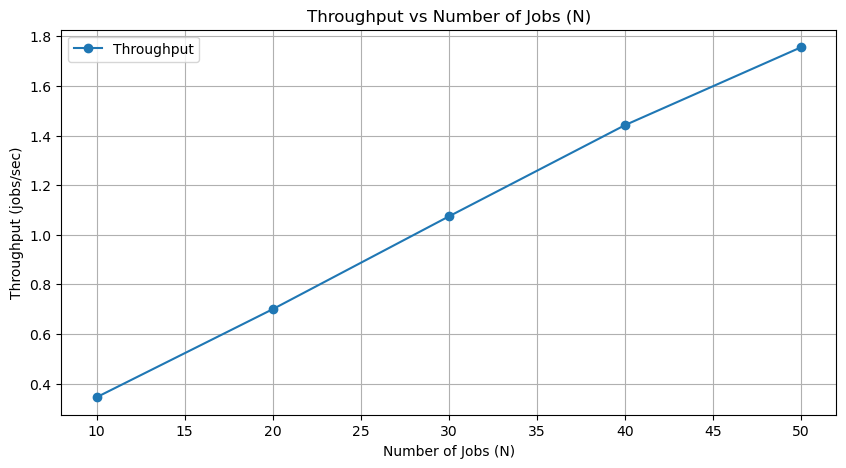

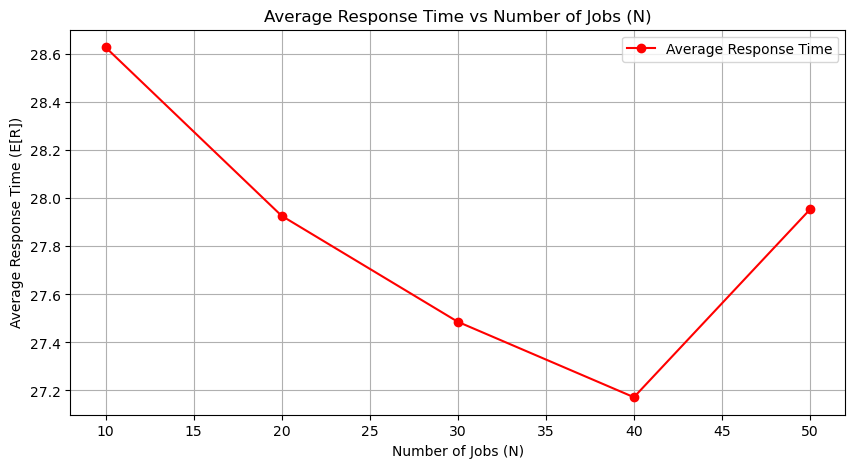

In [17]:
# class Job:
#     def __init__(self):
#         self.state = 'CPU'
#         self.time_remaining = 1  # CPU time is 1 second
#         self.total_time_in_system = 0  # Total response time for the job is initialized to 0

# def assign_disk(strategy):
#     if strategy == 1:  # Random assignment (among two fast and one slow disk)
#         return random.choice(['fast1', 'fast2', 'slow'])
#     elif strategy == 2:  # Weighted assignment (35% to each fast disk, 30% to slow)
#         r = random.random()
#         if r < 0.35:
#             return 'fast1'
#         elif r < 0.7:
#             return 'fast2'
#         else:
#             return 'slow'

def simulate_system(num_jobs, strategy, total_time):
    jobs = [Job() for _ in range(num_jobs)]
    time_elapsed = 0
    completed_jobs = 0
    total_response_time = 0

    while time_elapsed < total_time:
        for job in jobs:
            if job.state == 'CPU':
                job.time_remaining -= 1
                if job.time_remaining <= 0:
                    # Assign the job to either the fast or slow disk based on the strategy
                    job.state = assign_disk(strategy)
                    if job.state == 'fast':
                        job.time_remaining = 3  # Fast disk processing time
                    else:
                        job.time_remaining = 30  # Slow disk processing time

            elif job.state in ['fast', 'slow']:
                job.time_remaining -= 1
                if job.time_remaining <= 0:
                    # Move to the resting phase
                    job.state = 'rest'
                    job.time_remaining = 15  # Resting time

            elif job.state == 'rest':
                job.time_remaining -= 1
                if job.time_remaining <= 0:
                    # Job returns to CPU and starts its cycle again
                    job.state = 'CPU'
                    job.time_remaining = 2  # 1
                    completed_jobs += 1
                    # Record total response time for the completed job
                    total_response_time += job.total_time_in_system
                    job.total_time_in_system = 0  # Reset response time for new cycle

            # Every second, increase the total time spent in the system by 1 for each job
            job.total_time_in_system += 1

        time_elapsed += 1  # Increment simulation time

    # Calculate throughput: jobs completed per second
    throughput = completed_jobs / total_time
    # Calculate average response time
    avg_response_time = total_response_time / completed_jobs if completed_jobs > 0 else 0

    return throughput, avg_response_time

# Run the simulation for different values of N (number of jobs)
job_counts = [10, 20, 30, 40, 50]
total_time = 1000  # Total simulation time in seconds
better_strategy = 2  # Assuming the better-performing strategy is the weighted strategy

throughputs = []
response_times = []

for N in job_counts:
    throughput, avg_response_time = simulate_system(N, better_strategy, total_time)
    throughputs.append(throughput)
    response_times.append(avg_response_time)

# Plotting Throughput vs N
plt.figure(figsize=(10, 5))
plt.plot(job_counts, throughputs, marker='o', label='Throughput')
plt.xlabel('Number of Jobs (N)')
plt.ylabel('Throughput (jobs/sec)')
plt.title('Throughput vs Number of Jobs (N)')
plt.grid(True)
plt.legend()
plt.show()

# Plotting Average Response Time vs N
plt.figure(figsize=(10, 5))
plt.plot(job_counts, response_times, marker='o', color='red', label='Average Response Time')
plt.xlabel('Number of Jobs (N)')
plt.ylabel('Average Response Time (E[R])')
plt.title('Average Response Time vs Number of Jobs (N)')
plt.grid(True)
plt.legend()
plt.show()

### Open Queueing network simulation

#### 1.

#### 2.

In [2]:
import simpy

class Job:
    def __init__(self, job_id, env):
        self.id = job_id
        self.arrival_time = env.now  # Capture the time of job arrival


def job_generator(env, arrival_rate, cpu, fast_disk, slow_disk, case, results):
    """Generates jobs at a Poisson rate (inter-arrival times are exponential)"""
    job_id = 0
    while True:
        yield env.timeout(random.expovariate(arrival_rate))
        job_id += 1
        job = Job(job_id, env)
        env.process(handle_job(env, job, cpu, fast_disk, slow_disk, case, results))

        
def handle_job(env, job, cpu, fast_disk, slow_disk, case, results):
    """Processes a job through the CPU and then dispatches it to a disk"""
    arrival_time = job.arrival_time
    with cpu.request() as req:
        yield req
        cpu_processing_time = random.expovariate(1 / 10)  # CPU mean of 10 jobs per second
        yield env.timeout(cpu_processing_time)
    
    # Now decide which disk to route the job to
    if case == 'single_queue':
        # Randomly pick a disk with equal probability
        if random.choice([True, False]):
            chosen_disk = fast_disk
        else:
            chosen_disk = slow_disk
    elif case == 'separate_queues':
        # Shortest queue dispatching
        if len(fast_disk.queue) <= len(slow_disk.queue):
            chosen_disk = fast_disk
        else:
            chosen_disk = slow_disk

    # Process the job on the chosen disk
    with chosen_disk.request() as req:
        yield req
        disk_processing_time = random.expovariate(1 / chosen_disk.rate)
        yield env.timeout(disk_processing_time)
    
    # Track response time (time from arrival to completion)
    completion_time = env.now
    response_time = completion_time - arrival_time
    results.append(response_time)


def run_simulation(arrival_rate, case, simulation_time=10000):
    """Runs the queueing network simulation"""
    env = simpy.Environment()
    
    # Define resources (CPU, fast disk, slow disk)
    cpu = simpy.Resource(env, capacity=1)
    fast_disk = simpy.Resource(env, capacity=1)
    fast_disk.rate = 12  # Fast disk processes 12 jobs per second
    slow_disk = simpy.Resource(env, capacity=1)
    slow_disk.rate = 9   # Slow disk processes 9 jobs per second
    
    results = []  # List to store response times
    
    # Start the job generator
    env.process(job_generator(env, arrival_rate, cpu, fast_disk, slow_disk, case, results))
    
    # Run the simulation
    env.run(until=simulation_time)
    
    # Calculate average response time
    average_response_time = np.mean(results)
    return average_response_time


# Simulating the two cases for different arrival rates
arrival_rates = [5, 7, 9]  # Example arrival rates for testing

for rate in arrival_rates:
    avg_resp_single_queue = run_simulation(arrival_rate=rate, case='single_queue')
    avg_resp_separate_queues = run_simulation(arrival_rate=rate, case='separate_queues')
    
    print(f"Arrival Rate: {rate} jobs/sec")
    print(f"Case (i) - Single Queue Avg. Response Time: {avg_resp_single_queue:.4f} seconds")
    print(f"Case (ii) - Separate Queues Avg. Response Time: {avg_resp_separate_queues:.4f} seconds\n")


Arrival Rate: 5 jobs/sec
Case (i) - Single Queue Avg. Response Time: 4876.1073 seconds
Case (ii) - Separate Queues Avg. Response Time: 4813.2789 seconds

Arrival Rate: 7 jobs/sec
Case (i) - Single Queue Avg. Response Time: 4935.1942 seconds
Case (ii) - Separate Queues Avg. Response Time: 4876.1857 seconds

Arrival Rate: 9 jobs/sec
Case (i) - Single Queue Avg. Response Time: 4935.6849 seconds
Case (ii) - Separate Queues Avg. Response Time: 4971.3170 seconds

